1. **KOUOTOU LIBEME Kadija**, kadijakouotou@facsciences-uy1.cm
     * Departments of Physics, Faculty of Science, University of Yaounde 1,
     * PhD student at the Laboratory Atomic, Molecular and Biophysics Physics

The Python-based Simulation of Chemistry Framework (PySCF) is an open-source collection of electronics structure module powered by Python. The package of Pyscf provides a simple and efficient platform and methodoly development for quantum chemistry. PySCF can be used to simulate the properties of molecules, crystals, and custom Hamiltonians using mean-field and post-mean-field methods. 
Let's do the steps neccessary to perform a variety of relevant calculations in Pyscf, these calculations includes
* Single Point Energies
  * Ground State
    1. atomization energies and bond dissociation energies
    2. reaction energies
    3. electron affinities, ionization potentials, and proton affinities
    4. relative energies of isomers
    5. potential energy curves
  * Excited State (Time-Dependent)
    1. TD-HF/TD-DFT
    2. wavefunction stability analysis
    3. orbital visualization

* Forces/Geometry Optimizations
  * Ground State
    1. force calculation of equilibrium structure
    2. force calculation of non-equilibrium structure
    3. transition state search
    4. geometry optimization
  * Excited State (Time-Dependent)
     TODO

### <a id='toc1_'></a>[Getting started](#toc0_)

Firstly, we will import pyscf module, which is accomplished in cell below and our molecule is cyanoacetylene $\rm{C_3H_3NO}$. This molecule is used in some combustion propulsion systems, such as rocket engines and jet thrusters, it also has optical properties, such as fluorescence, which allows it to be used as a probe in certain imaging and sensing applications.

In [1]:
import pyscf

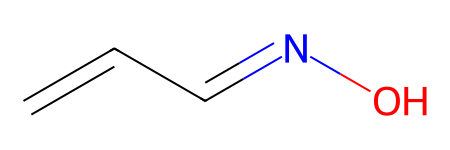

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
smile =  "C=CC=NO"
m = Chem.MolFromSmiles(smile)
m

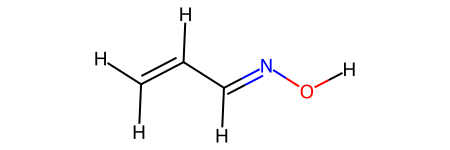

In [3]:
m1 = Chem.AddHs(m) #Using to add hydrogen atom to a molecule represented by the RDKit molecule object which we give us coordinates
m1

In [4]:
from rdkit.Chem import AllChem

In [5]:
AllChem.EmbedMolecule(m1) # to generate 3D coordinate for the molecule to 
AllChem.MMFFOptimizeMolecule(m1) # Update the molecule's coordinates
coords =m1.GetConformer().GetPositions() #Access the coordinates

for atom, coord in zip(m1.GetAtoms(), coords):
    print(f"{atom.GetSymbol()}: {coord}")

C: [-1.53895906  0.50003674  0.95661105]
C: [-1.02801444 -0.51864741  0.25628953]
C: [ 0.37705406 -0.50987487 -0.21428785]
N: [1.21485338e+00 4.51338701e-01 1.83943326e-04]
O: [ 2.44372394  0.1232135  -0.58527479]
H: [-2.56933261  0.48034124  1.29482916]
H: [-0.94520292  1.37434797  1.20861192]
H: [-1.61896146 -1.39091631  0.00439333]
H: [ 0.67413611 -1.41079126 -0.78129288]
H: [ 2.99070299  0.90095169 -0.36748142]


In [6]:
m1_xyz = Chem.MolToXYZBlock(m1)
m1_xyz = '\n'.join(m1_xyz.strip().split('\n')[1:])
print(m1_xyz)


C     -1.538959    0.500037    0.956611
C     -1.028014   -0.518647    0.256290
C      0.377054   -0.509875   -0.214288
N      1.214853    0.451339    0.000184
O      2.443724    0.123214   -0.585275
H     -2.569333    0.480341    1.294829
H     -0.945203    1.374348    1.208612
H     -1.618961   -1.390916    0.004393
H      0.674136   -1.410791   -0.781293
H      2.990703    0.900952   -0.367481


The next step is to define the molecule, which requires to import **gto (gaussian type orbital)** 

In [7]:
from pyscf import gto

In [8]:
mol_xyz= """"
C     -1.538959    0.500037    0.956611
C     -1.028014   -0.518647    0.256290
C      0.377054   -0.509875   -0.214288
N      1.214853    0.451339    0.000184
O      2.443724    0.123214   -0.585275
H     -2.569333    0.480341    1.294829
H     -0.945203    1.374348    1.208612
H     -1.618961   -1.390916    0.004393
H      0.674136   -1.410791   -0.781293
H      2.990703    0.900952   -0.367481"""

We use the keyword arguments of the **gto.Mole()** method to initialize  molecule and our apply molecular is cyanoacetylene $\rm{C_3H_3NO}$ :

In [25]:
from pyscf import gto # Gaussian type orbitals
import py3Dmol
# Ref: https://cccbdb.nist.gov/expgeom2x.asp

sys_mol=gto.Mole(
    atom=m1_xyz,
    basis='cc-pVDZ',
    charge=0,      # 0 by default
    spin=0,        # 0 by default, defined as (n_up - n_down)
    unit='Angstrom' # Can also be 'Bohr'
)

In [26]:
sys_mol.build()

In [27]:
print(f'Le nombre total d\'électrons est {sys_mol.nelectron} et le nombre total d\'électrons (alpha, béta) est {sys_mol.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {sys_mol.basis}, est {sys_mol.nao_nr()}')
print(f'L\'énergie nucléaire vaut {sys_mol.energy_nuc()} Hartrees')

Le nombre total d'électrons est 38 et le nombre total d'électrons (alpha, béta) est (19, 19)
Le nombre d'orbitales atomiques, dans la base cc-pVDZ, est 95
L'énergie nucléaire vaut 156.67570803721543 Hartrees


You can visualize your molecule by importing module **py3Dmol**

In [28]:
xyz_view = py3Dmol.view(width=500,height=500)
xyz_view.addModel(sys_mol.tostring(format="xyz"),'xyz')
xyz_view.setStyle({'stick':{}})
xyz_view.zoomTo()
xyz_view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Once initialize molecular, we create a mean-field object  for  SCF(Self consist field) (view next cell). This method consist to determine the electronic wavefunction and the corresponding total energy of a molecule. so we have a variety of revelant calcul SCF:
* RHF(Restricted Hartree-Fock)
* UHF(Unrestricrion Hartree-Fock)
* ROHF (Restricted Open-Shell Hartree-Fock)

The first step of these, is to import scf

In [29]:
from pyscf import scf

mf = scf.RHF(sys_mol)

In [30]:
mf.kernel() # you run kernel to see the converged SCF energy 

converged SCF energy = -245.746621919769


-245.74662191976932

After the SCF kernel has finished running, the mean-field object is updated with several useful output attributes:
1. **mf.mo_coeff** - Molecular orbital (MO) coefficients (matrix where rows are atomic orbitals (AO) and columns are MOs)
2. **mf.mo_energy** - MO energies (vector with length equal to number of MOs)
3. **mf.mo_occ** - MO occupancy (vector with length equal to number of MOs)
4. **mf.e_tot** - Total SCF energy in units of Hartrees
5. **mf.converged** - Status of SCF convergence (True indicates converged and False indicates unconverged)

In [31]:
mf.mo_occ

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
import plotly.express as px

Module **plotly** give us the orbitals molecular occupations (HOMO and LUMO) on a curve

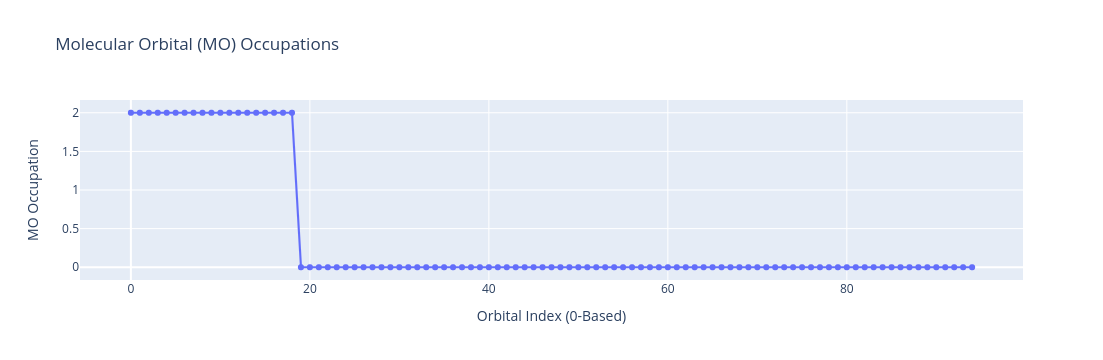

In [33]:
fig = px.line(y=mf.mo_occ, markers=True, title="Molecular Orbital (MO) Occupations")
fig.update_layout(xaxis_title="Orbital Index (0-Based)", yaxis_title="MO Occupation")
fig.show()

Let'us get indexes LUMO and HOMO energy

In [34]:
lumo_idx = mf.mo_occ.tolist().index(0.)
homo_idx = lumo_idx - 1
print(f"Les indexes du (HOMO,LUMO) sont {homo_idx,lumo_idx}")

Les indexes du (HOMO,LUMO) sont (18, 19)


These indexes means that, the energy gap will be calculate between the 18 and 19 point of orbital molecular 

Now we give the total SCF energy (in Hartree). This energy include the kinetic energy of electrons and the electron-electron interaction

In [35]:
mf.e_tot

-245.74662191976932

We can specify the output of 

In [36]:
mf=scf.RHF(sys_mol)
mf.verbose=4 #controls the print level for the mean-field objec
mf.kernel()



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmppmogoqor
max_memory 4000 MB (current use 516 MB)
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
init E= -246.469934642775
  HOMO = -0.228055184073282  LUMO = -0.0145524522823253
cycle= 1 E= -245.66612497936  delta_E= 0.804  |g|= 0.522  |ddm|= 3.03
  HOMO = -0.352466466755833  LUMO = 0.0546486336594837
cycle= 2 E= -245.731145425702  delta_E= -0.065  |g|= 0.255  |ddm|= 0.602
  HOMO = -0.339050441377572  LUMO = 0.0940966598040126
cycle= 3 E= -245.744693246551  delta_E= -0.0135  |g|= 0.0769  |ddm|= 0.219
  HOMO = -0.3372573369033  LUMO = 0.0983069523642948
cycle= 4 E= -245.74648634257  delta_E= -0.00179  |g|= 0.0146  |ddm|= 0.0905
 

-245.7466219197686

In [37]:
ana = mf.analyze()

**** SCF Summaries ****
Total Energy =                        -245.746621919768586
Nuclear Repulsion Energy =             156.675708037215429
One-electron Energy =                 -644.600250153897491
Two-electron Energy =                  242.177920196913476
**** MO energy ****
MO #1   energy= -20.593252341128   occ= 2
MO #2   energy= -15.6253712756557  occ= 2
MO #3   energy= -11.2850828098701  occ= 2
MO #4   energy= -11.252431731017   occ= 2
MO #5   energy= -11.2491698982929  occ= 2
MO #6   energy= -1.4183042559588   occ= 2
MO #7   energy= -1.15608986769844  occ= 2
MO #8   energy= -1.04267785694146  occ= 2
MO #9   energy= -0.867239259064495 occ= 2
MO #10  energy= -0.737878157618467 occ= 2
MO #11  energy= -0.715105042372295 occ= 2
MO #12  energy= -0.648727402991741 occ= 2
MO #13  energy= -0.629121747305842 occ= 2
MO #14  energy= -0.586516419145108 occ= 2
MO #15  energy= -0.56960559623175  occ= 2
MO #16  energy= -0.518544082487413 occ= 2
MO #17  energy= -0.444580473330063 occ= 2
MO #18

### Determination of means-field with DFT

To utilize additional functions beyond the standard SCF/HF in PySCF, the dft (density functional theory) module needs to be imported. Density functional theory is the most commonly used SCF method in computational chemistry. Running a DFT calculation in PySCF is relatively simple, similar to running a Hartree-Fock calculation. By importing the dft module, you can access and leverage the extended capabilities and features provided by PySCF for density functional theory calculations.

In [38]:
from pyscf import dft

The first step is to create the method object

In [39]:
mfd=scf.RKS(sys_mol)

We have several ways to calculate means-field with DFT and let'us give differents fonctionnelles: "B3LYP, PBE, TPSS..."
The **xc** attribute sets the density functional approximation.

In [40]:
Fonc= ["B3LYP", "PBE", "TPSS"]

for functional in Fonc:
    rks= dft.RKS(sys_mol)
    rks.xc= functional
    energy= rks.kernel()
    print(f"Énergy with functional {functional}: {energy} Hartree")

converged SCF energy = -247.228038525506
Énergy with functional B3LYP: -247.22803852550607 Hartree
converged SCF energy = -246.934948927823
Énergy with functional PBE: -246.9349489278232 Hartree
converged SCF energy = -247.272356594903
Énergy with functional TPSS: -247.27235659490344 Hartree


The cell above provide us the differents calculations energy with functional "B3LYP", "PBE" and TPSS. So we notice that with basic **cc-pVDZ** the energy SCF Obtain with TPSS is smaller than energy obtain with B3LYP and PBE. Energy obtain with B3LYP is a little close to experimental value (-246.087245 Hartree). The main objective is to found minimal energy which represents the equilibruim  state of the molecular structure and we conclude that energy obtain with TPSS is the best functionnal to calculate energy

### Comparison of differents DFT, MP2, CCSD and CCSD(T) methods

in this step we import **mp**, **ccsd** and **ccsd(t)**

In [41]:
from pyscf import mp, cc, fci
import time

** Time and Energy of Hartree Fock**

In [42]:
start = time.time()
myhf = scf.RHF(sys_mol).run()
myhf_time = time.time() - start
myhf_time

converged SCF energy = -245.746621919769


5.273756980895996

** Time and Energy of Density of Functionnal Theory **

In [43]:
start = time.time()
myks = dft.RKS(sys_mol, xc="B3LYP").run()
myks_time = time.time() - start
myks_time

converged SCF energy = -247.228038525506


48.01793026924133

** Time and Energy of Second-order Møller–Plesset perturbation theory (MP2)**

In [44]:
start = time.time()
mymp = mp.MP2(mf).run()
mymp_time = time.time() - start + myhf_time
mymp_time

E(MP2) = -246.509251091876  E_corr = -0.76262917210718
E(SCS-MP2) = -246.494097548515  E_corr = -0.747475628746209


6.921208381652832

This cell above show us electronical energy calculate with Moller-Plesset method and Scaled Moller-Plesset with a correlation.

** Time and Energy of Coupled-Cluster Single and Double**

In [45]:
start = time.time()
mycc = cc.CCSD(myhf).run()
mycc_time = time.time() - start + myhf_time

E(CCSD) = -246.5490901616335  E_corr = -0.8024682418649323


** Time and Energy CCSD including triple **

In [46]:
start= time.time()
e_ccsd_t = mycc.ccsd_t()
mycct_time = time.time() - start + myhf_time

CCSD(T) correction = -0.0292124198691629


Cell above brings us a correction on the CCSD via the triplet

**Time and Energy of Full Configuration Interaction**

In [ ]:
start = time.time()
myfci = fci.FCI(myhf)
myfci.run()
myfci_time = time.time() - start + myhf_time

Summary of these calculations are implemented in the next cells

In [47]:
# this cell collect data

methods = ["HF", "MP2", "CCSD", "CCSD(T)", "DFT"]
energies = [myhf.e_tot, mymp.e_tot, mycc.e_tot, mycc.e_tot + e_ccsd_t, myks.e_tot]
mf_times = [myhf_time, mymp_time, mycc_time, mycct_time, myks_time]

In [48]:
# We create a dataframe to read our results

import pandas as pd

df_Eies = pd.DataFrame({"Energy":energies, "Time":mf_times}, 
                        index = methods)

df_Eies

,Energy,Time
HF,-245.746622,5.273757
MP2,-246.509251,6.921208
CCSD,-246.549090,163.854193
CCSD(T),-246.578303,121.678519
DFT,-247.228039,48.017930


We notice that energy obtain with methods DFT are smaller than energy CCSD(T) with high calculation time. Others notice is that methode CCSD(T) bring a little correction at CCSD method. So the DFT is more conducive to performing calculations of the energies of our molecule. The Next cell show us the results in graphic form

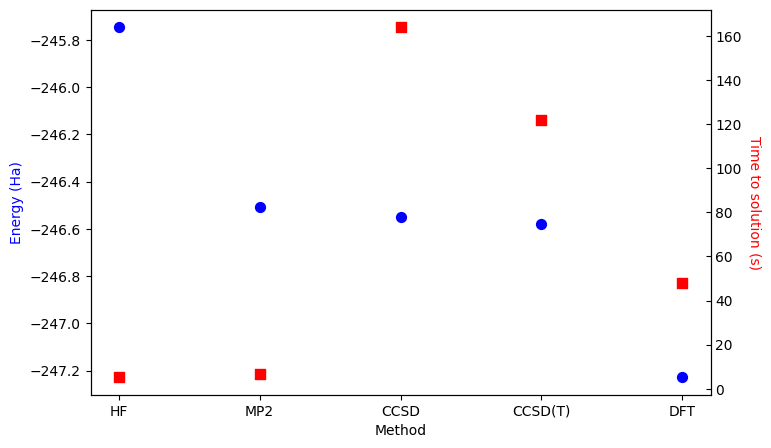

In [49]:
# Plotting
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies
ax.set_xticks(range(len(methods)), methods)
ax.set_xlabel("Method")
ax.set_ylabel("Energy (Ha)", color="b")
ax.scatter(range(len(methods)), energies, marker="o", s=50, color="b")
ax.set_xlabel("Method")

# Plot the time to solution
ax_time = ax.twinx()
ax_time.scatter(range(len(methods)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()

### Molecular Property

In [50]:
from pyscf import tddft

In [51]:
mytd = tddft.TDDFT(mf)
mytd.kernel()
mytd.analyze()



******** <class 'pyscf.tdscf.rhf.TDHF'> for <class 'pyscf.scf.hf.RHF'> ********
nstates = 3 singlet
deg_eia_thresh = 1.000e-03
wfnsym = None
conv_tol = 1e-09
eigh lindep = 1e-12
eigh level_shift = 0
eigh max_space = 50
eigh max_cycle = 100
chkfile = /tmp/tmppmogoqor
max_memory 4000 MB (current use 809 MB)


TD-SCF states [0, 1, 2] not converged.
Excited State energies (eV)
[0.68407333 2.47500656 5.74919289]

** Singlet excitation energies and oscillator strengths **
Excited State   1:      0.68407 eV   1812.44 nm  f=0.0292
      11 -> 20       -0.11770
      11 -> 24       -0.15605
      12 -> 20        0.13271
      13 -> 20        0.18382
      13 -> 24        0.12594
      14 -> 24       -0.16582
      14 -> 27        0.28799
      15 -> 20        0.10369
      16 -> 20       -0.47192
      16 -> 24        0.15118
      17 -> 20       -0.19113
      17 -> 24        0.15873
      17 -> 25        0.10741
      17 -> 27        0.15753
      17 -> 37       -0.14439
      18 -> 20     

In [52]:
# Singlet excitation energies
ee_singlets = mytd.e

# Singlet oscillators strength
OS_singlets = mytd.oscillator_strength(gauge='length')

In [53]:
# excitation triplet

ee_triplets = mytd.e

In [54]:
import os
import numpy as np
from pyscf.data import nist

au2ev = nist.HARTREE2EV

# Index of HOMO and LUMO
lumo_idx = myks.mo_occ.tolist().index(0.)
homo_idx = lumo_idx - 1

# Calculate the gap Homo-LUMO
E_HOMO = myks.mo_energy[homo_idx]*au2ev
E_LUMO = myks.mo_energy[lumo_idx]*au2ev
E_g = abs(E_HOMO - E_LUMO)

# fluorescence energy
f_energy = min(ee_singlets)

# Singlet-Tiplet gap
gap_ST = min(ee_singlets) - min(ee_triplets)

# Oscillator strength
OStr = OS_singlets[0]

# Lifetime calculation 
c = nist.LIGHT_SPEED # 
time_au = 2.4188843265857E-17 # in au

tau_au = c**3 / (2 * (f_energy)**2 * OStr) # in au
tau = tau_au * time_au # in seconds

# Multi-Objective function
mobj = OStr - gap_ST * au2ev - np.abs(f_energy * au2ev - 3.2)

In [55]:
import pandas as pd

# Create the results dataframe
list_results_TDA = [E_HOMO, E_LUMO, E_g, f_energy* au2ev, gap_ST* au2ev, OStr, tau* 1E+9, mobj]
dict_results_TDA = {'eV/ns': list_results_TDA}

df_TDA = pd.DataFrame(dict_results_TDA,
                    index = ['Homo energy', 'LUMO energy', 'Gap energy', 
                             'Fluorescence energy',
                             'Singlet-Triplet gap',
                             'Oscillator strength',
                             'Lifetime',
                             'Multi-Obj'])

df_TDA

,eV/ns
Homo energy,-6.356276
LUMO energy,-1.318445
Gap energy,5.037830
Fluorescence energy,0.684073
Singlet-Triplet gap,0.000000
Oscillator strength,0.029199
Lifetime,1686.616464
Multi-Obj,-2.486728


We notice that when a photon of energy  is absorbed it can excite an electron from the HUMO to the LUMO causing an electronic transition and which can be responsible for the absorption or emission of light, during the desexcitation this photon emit the light with a energy of 4.36ev. We also notice a Singlet-triplet gap of 0 ev which indicates an interconversion of the molecule between these two states. this interconversion is due to the chemical bond in the molecule.

In [56]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


In [57]:
def run_spectral_analysis(mol, xc="lda"):
    n_states=15
    spectral_width=0.1

    # Ground State DFT
    mf = dft.RKS(mol, xc=xc).run()

    # Excited State DFT
    mytd = tddft.TDA(mf)
    mytd.nstates = n_states
    mytd.max_space = 100
    mytd.max_cycle = 200
    mytd.kernel();
    mytd.analyze()
    osc_strengths = mytd.oscillator_strength()[:n_states-5]

    # Convolve lineshapes to make spectra
    energies_ev = mytd.e[:n_states-5]*au2ev
    x_range = np.linspace(energies_ev.min()*0.9, energies_ev.max()*1.1, num=1000)
    intensity = np.zeros(x_range.size)

    for e, f in zip(energies_ev, osc_strengths):
        intensity += gaussian(x_range, e, spectral_width) * f

    # Rough Normalization
    dx = (x_range[-1] - x_range[0])/x_range.size
    area = (intensity*dx).sum()
    intensity /= area


    return x_range, intensity

In [58]:
data = {"Excitation Energy (eV)":[], "Intensity":[], "Exchange-Correlation Functional":[]}

xcs = ["lda", "pbe", "B3LYP"]

for xc in xcs:
    ti = time.time()
    x_range, intensity = run_spectral_analysis(sys_mol, xc=xc)

    data["Excitation Energy (eV)"] += x_range.tolist()
    data["Intensity"] += intensity.tolist()
    data["Exchange-Correlation Functional"] += [xc]*x_range.size
    tf = time.time()
    print(f"Time for {xc.upper()} calculations: {tf-ti:.2f}\n")

df = pd.DataFrame(data)

converged SCF energy = -242.680771593359
Excited State energies (eV)
[4.54370065 5.21083123 6.00378392 6.09155761 6.48253737 6.54194095
 7.05272549 7.35162636 7.43778488 7.47740114 7.52364077 7.84893642
 7.88700521 8.04599755 8.30692079]

** Singlet excitation energies and oscillator strengths **
Excited State   1:      4.54370 eV    272.87 nm  f=0.0016
Excited State   2:      5.21083 eV    237.94 nm  f=0.3823
Excited State   3:      6.00378 eV    206.51 nm  f=0.0002
Excited State   4:      6.09156 eV    203.53 nm  f=0.1044
Excited State   5:      6.48254 eV    191.26 nm  f=0.0003
Excited State   6:      6.54194 eV    189.52 nm  f=0.0011
Excited State   7:      7.05273 eV    175.80 nm  f=0.0567
Excited State   8:      7.35163 eV    168.65 nm  f=0.0005
Excited State   9:      7.43778 eV    166.70 nm  f=0.0010
Excited State  10:      7.47740 eV    165.81 nm  f=0.0008
Excited State  11:      7.52364 eV    164.79 nm  f=0.0179
Excited State  12:      7.84894 eV    157.96 nm  f=0.0000
Excite

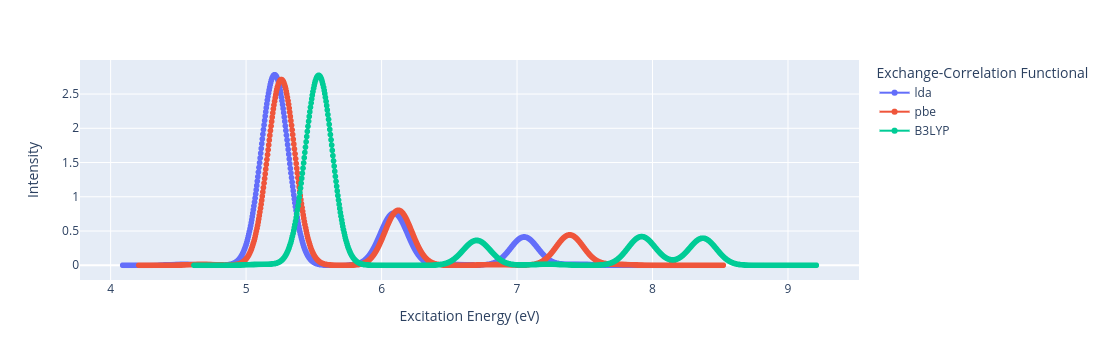

In [59]:
import plotly.express as px
fig = px.line(df, x="Excitation Energy (eV)", y="Intensity", markers=True, color="Exchange-Correlation Functional")
fig.show()

these graphic highlight the occurrence of both radiative and non-radiative transitions between singlet (S) and triplet (T) valence excited states, which happen at significantly distinct time intervals. We notice that, in the meantime [5 , 5.6 ev] we observe a peak of intensity at **2.8** with the functionals **lda** and **pbe** that means a probability of electronic transition between the energy levels and we have wavelength in meantime [ 26(, 138 nm] which is a **ultraviolet -C**. But in the meantime [5.4 , 5.9 ev] we observe a peak of intensity at **2.8** with the functionals **B3LYP** that means a probability of electronic transition between the energy levels and wavelength in meantime [241,  131 nm] is a ultraviolet-c. We conclude that our molecule is designed for protecting of environment and it has has germicidal and disinfectant properties.